# Managing flowsheets

### Retrieve any Unit, Stream or System object by ID

All BioSTEAM objects are registered in the main flowsheet. When BioSTEAM is first imported, the main flowsheet defaults to the 'default' flowsheet:

In [1]:
from biosteam import main_flowsheet, settings, units
main_flowsheet

<MainFlowsheet: default>

Find a Unit object:

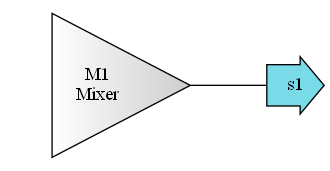

Mixer: M1
ins...
[0] missing stream
[1] missing stream
outs...
[0] s1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [2]:
settings.set_thermo(['Water', 'Ethanol'])
unit = units.Mixer('M1')
M1 = main_flowsheet('M1')
M1.diagram()
M1.show()

Find a Stream object:

In [3]:
s1 = main_flowsheet('s1')
s1.show()

Stream: s1 from <Mixer: M1>
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow: 0


All Unit objects can be viewed as a diagram:

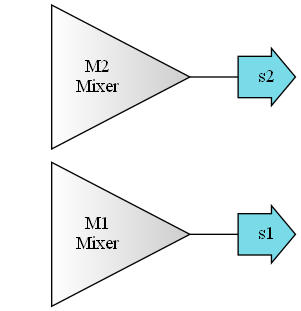

In [4]:
units.Mixer('M2')
main_flowsheet.diagram()

All Stream, Unit, and System objects are stored as Register objects in the `main_flowsheet`:

In [5]:
main_flowsheet.stream

Register:
 <Stream: s1>
 <Stream: s2>


In [6]:
main_flowsheet.unit

Register:
 <Mixer: M1>
 <Mixer: M2>


In [7]:
main_flowsheet.system

Register: (Empty)


Access items in a register:

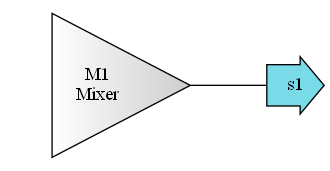

Mixer: M1
ins...
[0] missing stream
[1] missing stream
outs...
[0] s1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [8]:
M1 = main_flowsheet.unit.M1
M1.diagram()
M1.show()

### Switch between flowsheets

A new flowsheet may be created and set as the main flowsheet:

In [9]:
main_flowsheet.set_flowsheet('new_flowsheet')
main_flowsheet

<MainFlowsheet: new_flowsheet>

Now all new objects will be registered in the new flowsheet:

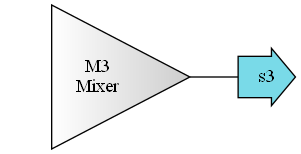

In [10]:
unit = units.Mixer('M3')
main_flowsheet.diagram()

Note that objects in the original flowsheet are not defined anymore and searching them would raise an error:

In [11]:
main_flowsheet('M1')

LookupError: no registered item 'M1'

All Flowsheet objects are added to the `flowsheet` registry. Switching between flowsheets is easy:

In [12]:
main_flowsheet.set_flowsheet('default') # Switch back to default flowsheet
main_flowsheet

<MainFlowsheet: default>

As an example, the `lipidcane` biorefinery defines its own flowsheet when you import it:

C:\Users\yrc2\OneDrive\Code\biosteam\biosteam\units\design_tools\pressure_vessel.py:88: UserWarning: vacuum pressure vessel ASME codes not implemented yet; wall thickness may be inaccurate and stiffening rings may be required
  warn('vacuum pressure vessel ASME codes not implemented yet; '


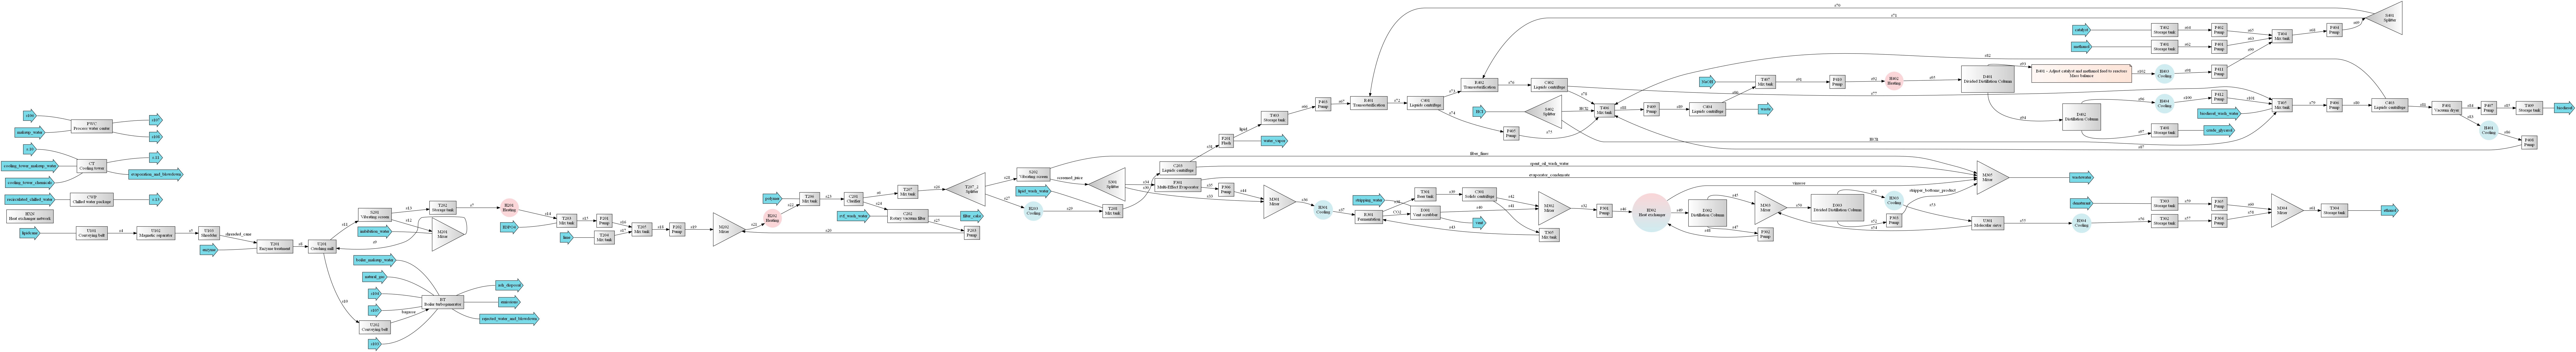

In [13]:
from biorefineries.lipidcane import lipidcane_sys
main_flowsheet.diagram()